In [1]:
!pip install nltk

In [69]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import preprocessing
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
spam_df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Projects\\SMS Spam Collection Dataset\\spam.csv',
                     encoding='ISO-8859-1')
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [71]:
spam_df.shape

(5572, 5)

In [72]:
spam_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [73]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [74]:
# Before Encoding
print(spam_df['v1'].unique())

['ham' 'spam']


In [75]:
label_encoding = preprocessing.LabelEncoder()
spam_df['v1'] = label_encoding.fit_transform(spam_df['v1'])

In [76]:
# Before Encoding
print(spam_df['v1'].unique())

[0 1]


In [77]:
spam_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [78]:
for columns in spam_df.columns:
    print(f'Column: {columns}')
    print(spam_df[columns].unique())
    print("------------------------------")

Column: v1
[0 1]
------------------------------
Column: v2
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
------------------------------


In [79]:
# Clean the "v2" column 
spam_df['v2'] = spam_df['v2'].str.lower()

def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

spam_df['v2'] = spam_df['v2'].apply(preprocess_text)

spam_df.head()

,v1,v2
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


#### Expolartory Data Analysis(EDA)

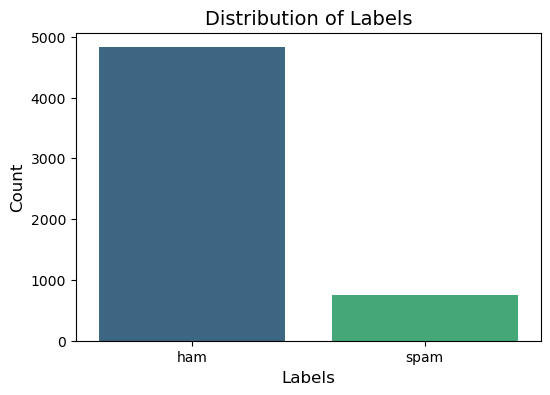

In [80]:
plt.figure(figsize = (6, 4))
sb.countplot(data = spam_df, x = 'v1', palette='viridis')

plt.title('Distribution of Labels', fontsize = 14)
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks([0, 1],['ham', 'spam'])

plt.show()

#### Feature Engineering

In [125]:
# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(spam_df['v2'])
tfidf_matrix

<5572x6708 sparse matrix of type '<class 'numpy.float64'>'
	with 44393 stored elements in Compressed Sparse Row format>

In [126]:
X = tfidf_matrix
y = spam_df['v1']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

TF-IDF Matrix Shape: (5572, 6708)
Training Data Shape: (4457, 6708)
Testing Data Shape: (1115, 6708)


#### Model

In [128]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators= 100, random_state= 0 )
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

#### Evaluate the Model

In [129]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("classification report:\n", classification_rep)

Accuracy: 0.9748878923766816
classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       949
           1       1.00      0.83      0.91       166

    accuracy                           0.97      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.97      0.97      1115



<Axes: >

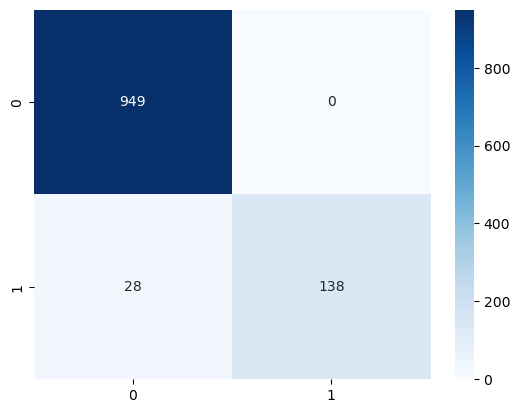

In [130]:
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot = True, fmt="d", cmap="Blues")

In [131]:
text = """FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"""
input_tfidf = tfidf_vectorizer.transform([text])
prediction = rf_classifier.predict(input_tfidf)

if prediction[0] == 1:
    print("SPAM SMS")
else:
    print("NOT SPAM.")

SPAM SMS


In [132]:
new_mail= """Congratulations on your recent achievement! Well done."""
input_tfidf = tfidf_vectorizer.transform([new_mail])
prediction = rf_classifier.predict(input_tfidf)

if prediction[0] == 1:
    print("SPAM SMS")
else:
    print("NOT SPAM.")

NOT SPAM.


In [133]:
input_text = """\apple Inc.Your iPhone 6 linked top***zm".edu) has been used a few minutes
ago. To localize it,login now to your apple account ."""
input_tfidf = tfidf_vectorizer.transform([input_text])
prediction = rf_classifier.predict(input_tfidf)

if prediction[0] == 1:
    print("SPAM SMS")
else:
    print("NOT SPAM.")

NOT SPAM.


In [134]:
text = """WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."""
input_tfidf = tfidf_vectorizer.transform([text])
prediction = rf_classifier.predict(input_tfidf)

if prediction[0] == 1:
    print("SPAM SMS")
else:
    print("NOT SPAM.")

SPAM SMS
